<a href="https://colab.research.google.com/github/niklasfaller/DIS21-BIg-Data/blob/main/Ex2_Classifiying_MNist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<image src="https://www.th-koeln.de/img/logo.svg">

<img src="https://www.th-koeln.de/img/logo.svg" style="float: right;" width="200">

# 2nd exercise: <font color="#C70039">Classifying the MNIST data set</font>
* Course: DIS21a.1
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook modifications and adaptations: Niklas Faller
* Date:   13.12.2023

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**:
Please make sure you are reading the entire notebook, since it contains a lot of information about your tasks (e.g. regarding the set of certain paramaters or specific computational tricks, etc.), and the written mark downs as well as comments contain a lot of information on how things work together as a whole.

**GENERAL NOTE 2**:
* Please, when commenting source code, just use English language only.
* When describing an observation (for instance, after you have run through your test plan) you may use German language.
This applies to all exercises in DIS 21a.1.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for classifying the MNIST data set. That is an inbuild data set coming along with keras. Keras is using tensorflow in the backend.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
Within this notebook, the tasks that you need to work on are always listed as bullet points below.
If a task is more challenging and consists of several steps, this is indicated as well.
Make sure you have worked down the task list and commented your doings.
This should be done using markdown.<br>
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook before submitting it.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab.
2. make sure you specified you name and your matriculation number in the header below my name and date.
    * set the date too and remove mine.
3. read the *entire* notebook carefully.
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time and note the result in a markdown table.
        * I have provided you with an example of a table in markdown (see below). Make sure you adapt your table accordingly.
        * Put the table at the end of the notebook.
        * This type of table will be needed in the other exercises as well. Always put it at the end.
    
| type of method | loss function | optimizer | accuracy |
| :-: | :-: | :-: | :-: |
| classification | categorical_crossentropy | bamm !|.666

4. do some tensor slicing on the training images as well as the labels.
    * slice the first 100
    * slice the last 13
    * slice between 666 and 999
    * slice one image at index '666' and slice the center part of that image
        * visualize that image (original and sliced)
5. take less training data and rerun the network.
    * add the size of the <ins>training</ins> data as a column in the table and note the accuracy you achieve
6. take less testing data and rerun the network.
    * add the size of the <ins>testing</ins> data as a column in the table and note the accuracy you achieve
7. increase/decrease the number of epochs and the batch size.
    * add those hyperparameters as columns in the table and note down the accuracy you achieve
8. make combinations of this (NOTE: what you are doing here is writing your own test plan, a big future task of yours once you became a data scientist. Make sure you combine with sense and intelligence and not just chaotically.).
9. comment your observations.
    * when is the accuracy increasing/decreasing?

-----------------------------------------------------------------------------------




## START OF THE NOTEBOOK CODE
----------------------------------------------------------------------------------------------------------------------
### necessary imports
others are going to be included as soon as they are needed

**GENERAL CODE REMARK**: the common way to import is: "from keras.datasets import mnist" (see below).
However, this throws several warnings depending on the version of tensorflow you are trying to use. Sometimes this is not compatible.<br>
However, by adding "tensorflow." before "keras." that warning is resolved.  
This hack was found in a thread on stackoverflow, that is a valuable ressource for you too.

In [120]:
import tensorflow
from tensorflow.keras.datasets import mnist
tensorflow.__version__

'''Original'''
# from keras.datasets import mnist
# if you are using Google Colab, this import line should work without causing any problems.
# See general code remark above

'Original'

### loading the MNIST data set

In [121]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### print some shape of the training images and labels until you feel comfortable with the data set structure

In [122]:
train_images.shape

(60000, 28, 28)

In [123]:
train_labels.shape

(60000,)

In [124]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [125]:
len(test_labels)

10000

### more imports
<font color=red>NOTE</font>: the original import was: "from keras import models" and "layers". However, this throws several warning. Adding "tensorflow." before "keras." solves this. // Found in a thread on stackoverflow.

In [126]:
from tensorflow.keras import models
from tensorflow.keras import layers

### building the ANN
* set the activation function to ReLu
* define the shape of the input images
* define the size of the output layer
* define the size of the hidden, fully connected layer
* define softmax as the probability function

In [127]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [128]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

### Prepare the image data and normalize them (/255 since they were 8Bit-encoded)

In [129]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

### categorical encoding of the labels is needed

In [130]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [131]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2671 - accuracy: 0.9233
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1085 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0712 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0518 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0386 - accuracy: 0.9885


In [132]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0652 - accuracy: 0.9804


In [133]:
print('test_acc:', test_acc)

test_acc: 0.980400025844574


| Type of Method | Loss Function | Optimizer | Accuracy | Size of Test Data | Size of Training Data | Epochs (Amount) |
| --------------- | ------------- | --------- | -------- | ------------------ | --------------------- | -------------- |
| Classification  | Categorical Crossentropy | Adam (default) | 98,04%   | 10,000 | 60,000 | 5  |


That's the final accuracy result for the classification of the test data set.

### <font color="#C70039">Include your result table here and reflect a good test plan (see task list)</font>

4. do some tensor slicing on the training images as well as the labels.
    * slice the first 100
    * slice the last 13
    * slice between 666 and 999
    * slice one image at index '666' and slice the center part of that image
        * visualize that image (original and sliced)

In [134]:
import matplotlib.pyplot as plt

In [135]:
import tensorflow
from tensorflow.keras.datasets import mnist
tensorflow.__version__

'2.15.0'

In [136]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [137]:
slice_first_100_images = train_images[:100]
slice_first_100_labels = train_labels[:100]

slice_last_13_images = train_images[-13:]
slice_last_13_labels = train_labels[-13:]

slice_between_images = train_images[666:999]
slice_between_labels = train_labels[666:999]
slice_666 = train_images[666]

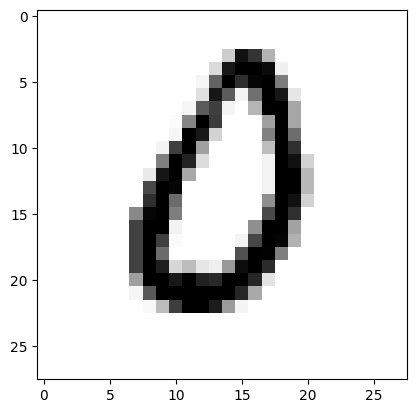

In [138]:
plt.imshow(slice_666, cmap = plt.cm.binary)
plt.show()

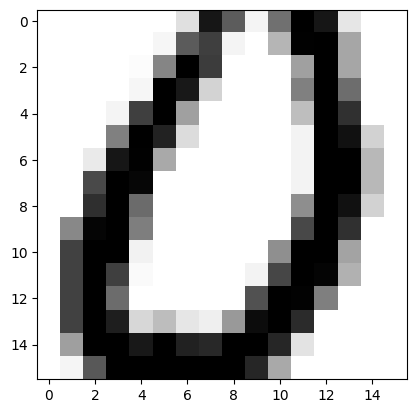

In [139]:
slice_666_center = train_images[666,6:-6,6:-6]
plt.imshow(slice_666_center, cmap = plt.cm.binary)
plt.show()

5. take less training data and rerun the network.
    * add the size of the <ins>training</ins> data as a column in the table and note the accuracy you achieve

In [140]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [141]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [142]:
#prepare images

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
train_images1 = train_images[:20000]
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [143]:
#categorize
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_labels1 = train_labels[:20000]


In [144]:
network.fit(train_images1, train_labels1, epochs=5, batch_size=128)

Epoch 1/5
157/157 [==============================] - 2s 10ms/step - loss: 0.4287 - accuracy: 0.8800
Epoch 2/5
157/157 [==============================] - 2s 14ms/step - loss: 0.1939 - accuracy: 0.9438
Epoch 3/5
157/157 [==============================] - 2s 12ms/step - loss: 0.1320 - accuracy: 0.9627
Epoch 4/5
157/157 [==============================] - 1s 9ms/step - loss: 0.0962 - accuracy: 0.9729
Epoch 5/5
157/157 [==============================] - 1s 9ms/step - loss: 0.0698 - accuracy: 0.9804


In [145]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1160 - accuracy: 0.9642


In [146]:
print('test_acc:', test_acc)

test_acc: 0.9642000198364258


| Type of Method | Loss Function | Optimizer | Accuracy | Size of Test Data | Size of Training Data | Epochs (Amount) |
| --------------- | ------------- | --------- | -------- | ------------------ | --------------------- | -------------- |
| Classification  | Categorical Crossentropy | Adam (default) | 96,42%   | 10,000 | 20,000 | 5  |

In [147]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [148]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [149]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [150]:
#prepare images

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
test_images2 = test_images[:5000]


In [151]:
#categorize
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

test_labels2 = test_labels[:5000]

In [152]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images2, test_labels2)

print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2635 - accuracy: 0.9234
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1081 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0709 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0513 - accuracy: 0.9846
Epoch 5/5
157/157 [==============================] - 1s 2ms/step - loss: 0.0879 - accuracy: 0.9712
test_acc: 0.9711999893188477


| Type of Method | Loss Function | Optimizer | Accuracy | Size of Test Data | Size of Training Data | Epochs (Amount) |
| --------------- | ------------- | --------- | -------- | ------------------ | --------------------- | -------------- |
| Classification  | Categorical Crossentropy | Adam (default) | 97,12%   | 5,000 | 60,000 | 5  |

In [153]:
network.fit(train_images, train_labels, epochs=3, batch_size=128)

test_loss, test_acc = network.evaluate(test_images2, test_labels2)

print('test_acc:', test_acc)

Epoch 1/3
469/469 [==============================] - 5s 11ms/step - loss: 0.0286 - accuracy: 0.9917
Epoch 2/3
469/469 [==============================] - 4s 9ms/step - loss: 0.0219 - accuracy: 0.9940
Epoch 3/3
157/157 [==============================] - 0s 2ms/step - loss: 0.1197 - accuracy: 0.9638
test_acc: 0.9638000130653381


| Type of Method | Loss Function | Optimizer | Accuracy | Size of Test Data | Size of Training Data | Epochs (Amount) |
| --------------- | ------------- | --------- | -------- | ------------------ | --------------------- | -------------- |
| Classification  | Categorical Crossentropy | Adam (default) | 96,38%   | 5,000 | 60,000 | 3  |

In [154]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

test_loss, test_acc = network.evaluate(test_images2, test_labels2)

print('test_acc:', test_acc)

Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0124 - accuracy: 0.9968
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0090 - accuracy: 0.9980
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0067 - accuracy: 0.9986
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0052 - accuracy: 0.9990
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 7/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0017 - accuracy: 0.9998
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 9.1430e-04 - accuracy: 1.0000
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 6.4640e-04 - accuracy: 1.0000
Epoch 10/10
157/157 [==============================] - 0s 2ms/step - loss: 0.1014 - acc

| Type of Method | Loss Function | Optimizer | Accuracy | Size of Test Data | Size of Training Data | Epochs (Amount) |
| --------------- | ------------- | --------- | -------- | ------------------ | --------------------- | -------------- |
| Classification  | Categorical Crossentropy | Adam (default) | 97,60%   | 5,000 | 60,000 | 10  |

| Type of Method | Loss Function | Optimizer | Accuracy | Size of Test Data | Size of Training Data | Epochs (Amount) |
| --------------- | ------------- | --------- | -------- | ------------------ | --------------------- | -------------- |
| Classification  | Categorical Crossentropy | Adam (default) | 98,04%   | 10,000 | 60,000 | 5  |
| Classification  | Categorical Crossentropy | Adam (default) | 96,42%   | 10,000 | 20,000 | 5  |
| Classification  | Categorical Crossentropy | Adam (default) | 97,12%   | 5,000 | 60,000 | 5  |
| Classification  | Categorical Crossentropy | Adam (default) | 96,83%   | 5,000 | 60,000 | 3  |
| Classification  | Categorical Crossentropy | Adam (default) | 97,60%   | 5,000 | 60,000 | 10  |